In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import geopandas as gpd
import folium

In [ ]:
df_police = pd.read_csv("D:\\Anindya\\ISI Project - Data Cleaning + Data Annotation\\Police Disposal of States\\Police Disposal of Cases (States).csv")
df_court = pd.read_csv("D:\\Anindya\\ISI Project - Data Cleaning + Data Annotation\\Court Disposal of States\\Court Disposal of Cases(States).csv")


df_police.head(), df_court.head()

(   Year   Crime Type         States/UTs  Total # FIR  Total # Final Report  \
 0  2022  (IPC + SLL)     Andhra Pradesh       195284                 26640   
 1  2022  (IPC + SLL)  Arunachal Pradesh         2761                  1699   
 2  2022  (IPC + SLL)              Assam        68937                 95256   
 3  2022  (IPC + SLL)              Bihar       347835                 63505   
 4  2022  (IPC + SLL)       Chhattisgarh       121065                 14965   
 
    FR Non-Cognizable  FR False  Mistake of Fact / Law / Civil Dispute  \
 0                 56      5963                                   3539   
 1                  2         3                                    103   
 2                270      2895                                  20944   
 3               2050      9690                                  14859   
 4                567      2081                                    992   
 
    True but insufficient evidence  Cases Abated  Total # Charge Sheeted  \
 0

In [ ]:

df_police_grouped = df_police.groupby(['Year', 'States/UTs'])['Total # Cases Disposed Off by Police'].sum().reset_index()


df_police_grouped.head()

,Year,States/UTs,Total # Cases Disposed Off by Police
0,2018,A&N Islands,3822
1,2018,Andhra Pradesh,154141
2,2018,Arunachal Pradesh,2572
3,2018,Assam,137098
4,2018,Bihar,249276


In [ ]:

df_court_grouped = df_court.groupby(['Year', 'States/Uts'])['Total # Cases Disposed Off by Courts'].sum().reset_index()


df_court_grouped.head()

,Year,States/Uts,Total # Cases Disposed Off by Courts
0,2018,A&N Islands,1534
1,2018,Andhra Pradesh,125902
2,2018,Arunachal Pradesh,476
3,2018,Assam,38943
4,2018,Bihar,21185


In [ ]:
def generate_distinct_colors(num_colors):
    """
    Generate distinct colors for a given number of pie chart sections.
    Colors will be randomized to ensure better visual distinction.
    """
    colors = []
    for i in range(num_colors):
        color = [random.random(), random.random(), random.random()]  
        colors.append(color)
    return colors

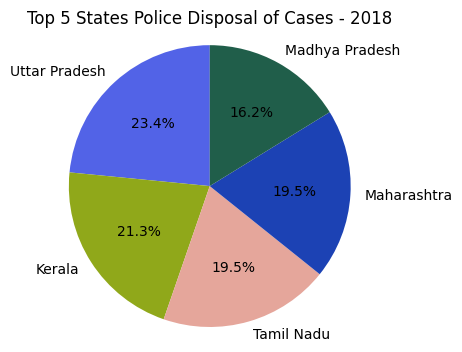

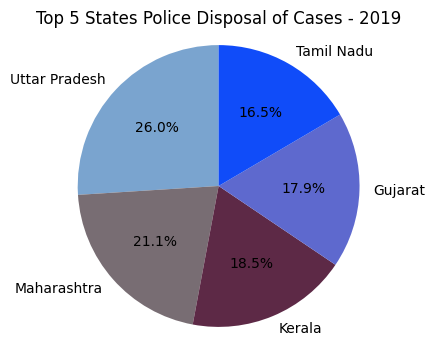

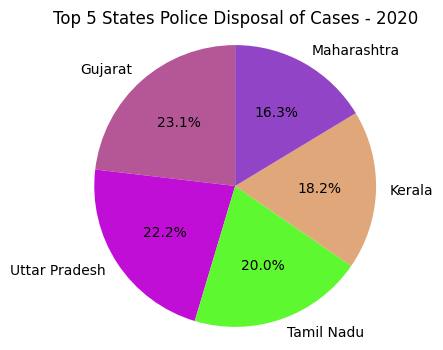

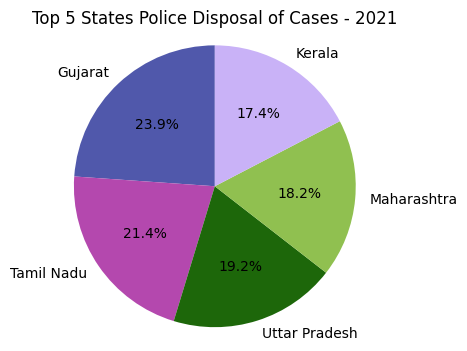

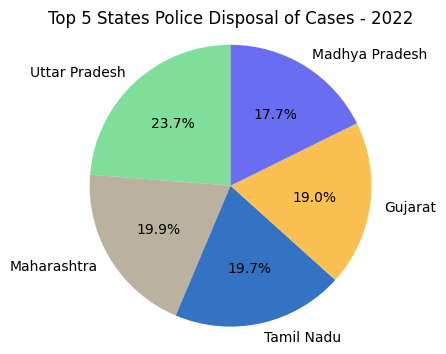

In [ ]:

for year in range(2018, 2023):
    year_data = df_police_grouped[df_police_grouped['Year'] == year]
    
    
    top_5_states = year_data.nlargest(5, 'Total # Cases Disposed Off by Police')
    
    
    pie_colors = generate_distinct_colors(5)  
    
    
    plt.figure(figsize=(4, 4))
    plt.pie(top_5_states['Total # Cases Disposed Off by Police'], labels=top_5_states['States/UTs'], autopct='%1.1f%%', colors=pie_colors, startangle=90)
    plt.title(f'Top 5 States Police Disposal of Cases - {year}')
    plt.axis('equal')
    plt.savefig(f'Top 5 States Police Disposal of Cases - {year}.png', bbox_inches='tight')
    plt.show()

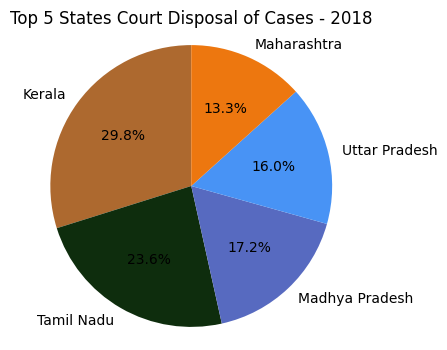

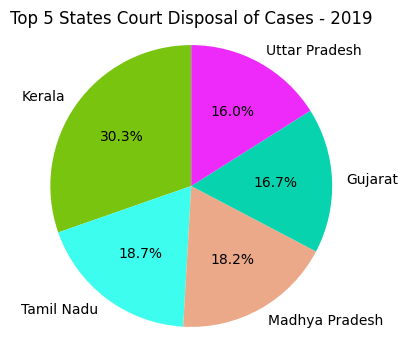

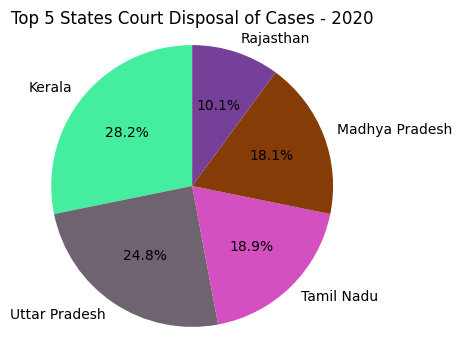

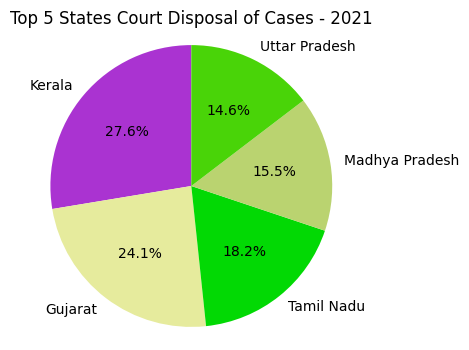

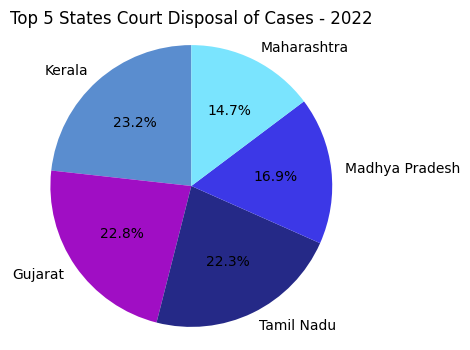

In [ ]:

for year in range(2018, 2023):
    year_data = df_court_grouped[df_court_grouped['Year'] == year]
    
    
    top_5_states = year_data.nlargest(5, 'Total # Cases Disposed Off by Courts')
    
    
    pie_colors = generate_distinct_colors(5)  
    
    
    plt.figure(figsize=(4, 4))
    plt.pie(top_5_states['Total # Cases Disposed Off by Courts'], labels=top_5_states['States/Uts'], autopct='%1.1f%%', colors=pie_colors, startangle=90)
    plt.title(f'Top 5 States Court Disposal of Cases - {year}')
    plt.axis('equal') 
    plt.savefig(f'Top 5 States Court Disposal of Cases - {year}.png', bbox_inches='tight') 
    plt.show()

In [ ]:

states_police = ['Bihar', 'Delhi', 'West Bengal', 'Uttar Pradesh', 'Maharashtra']  
states_court = ['Bihar', 'Delhi', 'West Bengal', 'Uttar Pradesh', 'Maharashtra']  


df_police_selected = df_police[df_police['States/UTs'].isin(states_police)]

df_court_selected = df_court[df_court['States/Uts'].isin(states_court)]


df_police_selected_pivot = df_police_selected.pivot_table(index='States/UTs', columns='Year', values='Total # Cases Disposed Off by Police', aggfunc='sum')


df_court_selected_pivot = df_court_selected.pivot_table(index='States/Uts', columns='Year', values='Total # Cases Disposed Off by Courts', aggfunc='sum')


df_combined = pd.concat([df_police_selected_pivot, df_court_selected_pivot], axis=1, keys=['Police', 'Court'])


df_combined


Police                                   Court                  \
Year             2018    2019    2020    2021    2022    2018    2019    2020   
Bihar          249276  252311  220046  278337  362828   21185   26839    5761   
Delhi          293844  327437  266035  301121  312907   30895   37073   28879   
Maharashtra    489356  513302  486744  562539  543699  237285  231181   87940   
Uttar Pradesh  587098  633955  662034  594931  649085  285247  273411  257886   
West Bengal    198826  199681  177025  183948  178462   35582   35582   15620   

                               
Year             2021    2022  
Bihar           10699   32735  
Delhi           50073   66503  
Maharashtra    232640  309911  
Uttar Pradesh  268236  234353  
West Bengal     23651   35481

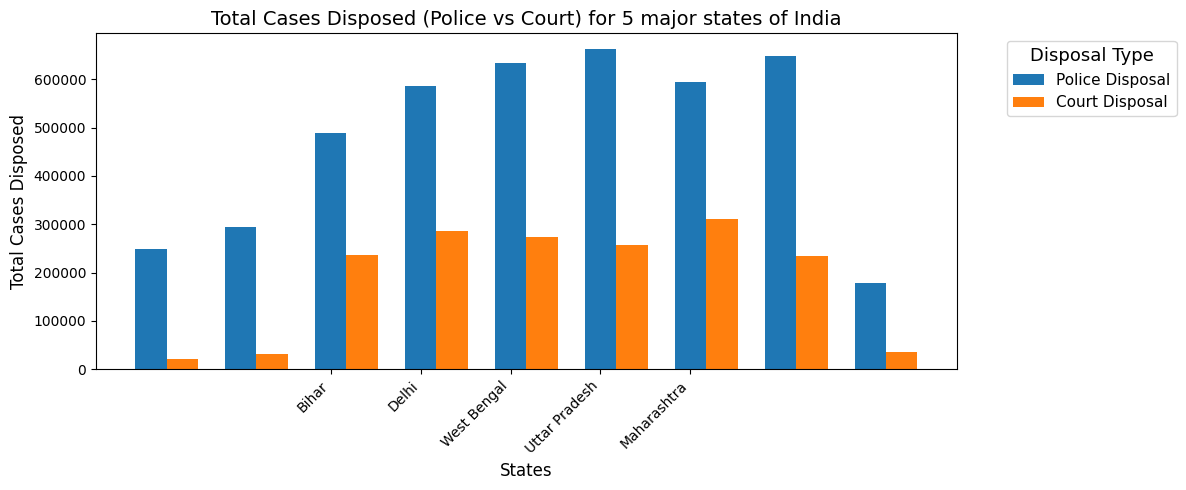

In [ ]:

selected_states = ['Bihar', 'Delhi', 'West Bengal', 'Uttar Pradesh', 'Maharashtra']  # Replace with your specific states


df_police_selected_pivot_selected = df_police_selected_pivot[df_police_selected_pivot.index.isin(selected_states)]
df_court_selected_pivot_selected = df_court_selected_pivot[df_court_selected_pivot.index.isin(selected_states)]


fig, ax = plt.subplots(figsize=(12, 5))


bar_width = 0.35
years = [2018, 2019, 2020, 2021, 2022]
num_states = len(selected_states)
index = range(num_states)  


space_between_groups = 1  


for i, year in enumerate(years):
    ax.bar(
        [p + space_between_groups*i for p in index],  
        df_police_selected_pivot_selected[year],      
        bar_width,
        label=f'Police {year}',                      
        color='tab:blue'                              
    )
    ax.bar(
        [p + space_between_groups*i + bar_width for p in index],  
        df_court_selected_pivot_selected[year],                    
        bar_width,
        label=f'Court {year}',                            
        color='tab:orange'                               
    )


ax.set_title('Total Cases Disposed (Police vs Court) for 5 major states of India', fontsize=14)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel('Total Cases Disposed', fontsize=12)

ax.set_xticks([p + space_between_groups*(len(years)-1)/2 for p in index])  # Center ticks for each state group
ax.set_xticklabels(selected_states, rotation=45, ha='right')  # State names on the x-axis


ax.legend(['Police Disposal', 'Court Disposal'], title='Disposal Type', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.savefig(f'Total Cases Disposed (Police vs Court) for 5 major states of India.png', bbox_inches='tight')  
plt.show()
